# Etapa 1 - estudo das informações gerais

In [1]:
# importando as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
import plotly.express as px
from datetime import datetime


In [2]:
# Carregando o arquivo 
df_proj_int_1 = pd.read_csv('/datasets/games.csv')

In [3]:
# obtendo informações gerais sobre os dados
df_proj_int_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- foi possível observar que várias colunas tem valores ausentes

In [4]:
# obtenha as primeiras linhas da tabela
df_proj_int_1.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Etapa 2 - Prepare os dados

In [5]:
# imprimir nomes das colunas
print(df_proj_int_1.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [6]:
# substituir os nomes das colunas
new_name_colum = []
for old_name in df_proj_int_1.columns:
    name_lower = old_name.lower()
    new_name_colum.append(name_lower)
df_proj_int_1.columns = new_name_colum
print(new_name_colum)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [7]:
# verificar valores ausentes
print(df_proj_int_1.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [8]:
print(df_proj_int_1.isna().mean())

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


In [9]:
df_proj_int_1 = df_proj_int_1.dropna(subset=['year_of_release'])

In [10]:
print(df_proj_int_1.isna().mean())

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.401739
rating             0.406056
dtype: float64


In [11]:
df_proj_int_1['year_of_release'] = df_proj_int_1['year_of_release'].astype('int')

In [12]:
df_proj_int_1['user_score'] = pd.to_numeric(df_proj_int_1['user_score'], errors='coerce')

- como a quantidade de linhas com valores ausentes na coluna year_of_release era abaixa, resolvi remove-los para poder converter os dados para números inteiros
- os valores ausentes nas colunas 'critic_score' e 'user_score' ficaram em branco, pois como é uma avaliação dos criticos ou dos usuários, não existe lógica para se definir um valor, pois são jogos e plataformar diferentes, ou seja, uma média ou um valor qualquer não seria válido
- os valores ausentes em 'rating' ocorreram, possivelmente, por ainda não existir uma classificação para o jogo e assim como não item anterior, não existe lógica para se defeinir esse valor, pois além de ser jogos diferentes, essa coluna é uma string, não sendo possível fazer uma comparação ou uma média.
- os casos como valor TBD também será deixado dessa maneira, pois assim como nos casos anteriores, os usuários ainda não deram uma nota para o jogo e a avaliação não pode ser comparada, não é possível fazer uma média e o resultado ser plausível

In [13]:
total_sale = df_proj_int_1.groupby('name')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()
total_sale['total_sale'] = total_sale[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
total_sale = total_sale.drop(columns=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

df_proj_int_1 = df_proj_int_1.merge(total_sale, on='name', how='left')

print(df_proj_int_1)
                                                                         

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16441  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16442               LMA Manager 2007     X360             2006        Sports   
16443        Haitaka no Psychedelica      PSV             2016     Adventure   
16444               Spirits & Spells      GBA             2003      Platform   
16445            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

# Etapa 3 - analise os dados

    year_of_release  total_year
0              1980           9
1              1981          46
2              1982          36
3              1983          17
4              1984          14
5              1985          14
6              1986          21
7              1987          16
8              1988          15
9              1989          17
10             1990          16
11             1991          41
12             1992          43
13             1993          60
14             1994         121
15             1995         219
16             1996         263
17             1997         289
18             1998         379
19             1999         338
20             2000         350
21             2001         482
22             2002         829
23             2003         775
24             2004         762
25             2005         939
26             2006        1006
27             2007        1197
28             2008        1427
29             2009        1426
30      

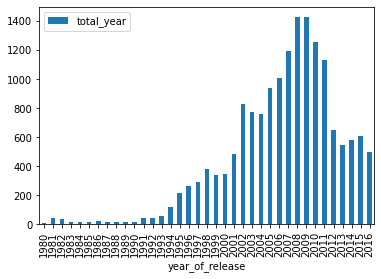

In [14]:
total_year = df_proj_int_1.groupby(by='year_of_release')['name'].count().reset_index()
total_year = total_year.rename(columns={'name': 'total_year'})

print(total_year)

total_year.plot(x = 'year_of_release', y = 'total_year', kind='bar')
plt.show()


- os dados entre os anos 1980 até 1993 não são significativos, pois a quantidade de jogos é baixa

In [15]:
total_platform = df_proj_int_1.groupby('platform')['total_sale'].sum().reset_index()
total_platform = total_platform.sort_values(by='total_sale', ascending=False)
print(total_platform)

   platform  total_sale
28     X360     2608.56
17      PS3     2524.78
16      PS2     2117.97
13       PC     1876.70
26      Wii     1722.93
4        DS     1501.03
29       XB      947.31
15       PS      883.65
19      PSP      861.92
7        GC      822.15
18      PS4      801.80
6       GBA      756.56
30     XOne      741.58
2       3DS      510.35
27     WiiU      401.76
5        GB      360.67
10      N64      348.75
11      NES      336.09
20      PSV      278.38
23     SNES      240.59
0      2600      110.90
21      SAT       58.83
8       GEN       46.48
3        DC       23.72
25       WS        4.80
12       NG        2.58
22      SCD        1.86
24     TG16        0.16
1       3DO        0.10
9        GG        0.04
14     PCFX        0.03


<AxesSubplot:>

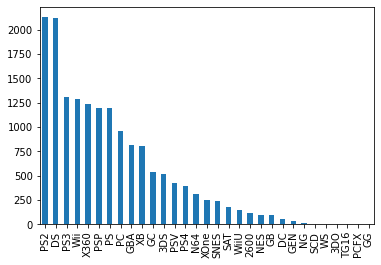

In [16]:
total_year = df_proj_int_1['platform'].value_counts().sort_index()
total_year = total_year.sort_values(ascending=False)
total_year.plot(kind='bar')

# falta separar por ano

In [17]:
filtered_df = df_proj_int_1[df_proj_int_1['year_of_release'] >= 2013]
filtered_df = filtered_df[filtered_df['year_of_release'] <= 2017]

total_year_sale = filtered_df.groupby(['platform', 'year_of_release']).size().reset_index(name='total_sales')

print(total_year_sale)

   platform  year_of_release  total_sales
0       3DS             2013           91
1       3DS             2014           80
2       3DS             2015           86
3       3DS             2016           46
4        DS             2013            8
5        PC             2013           38
6        PC             2014           47
7        PC             2015           50
8        PC             2016           54
9       PS3             2013          126
10      PS3             2014          108
11      PS3             2015           73
12      PS3             2016           38
13      PS4             2013           16
14      PS4             2014           75
15      PS4             2015          137
16      PS4             2016          164
17      PSP             2013           54
18      PSP             2014           10
19      PSP             2015            3
20      PSV             2013           63
21      PSV             2014          100
22      PSV             2015      

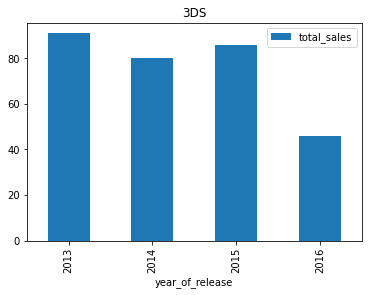

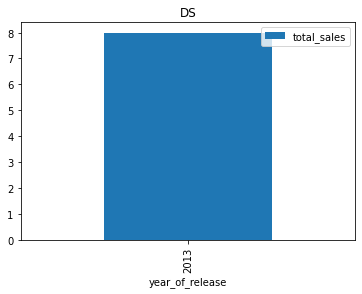

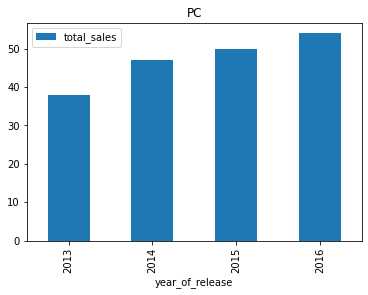

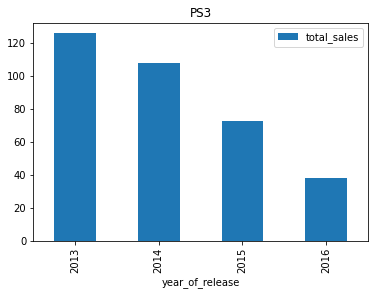

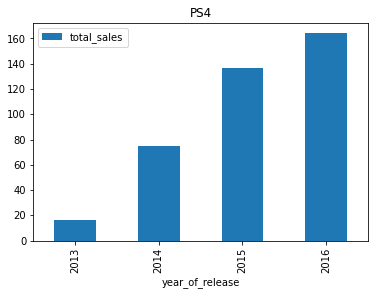

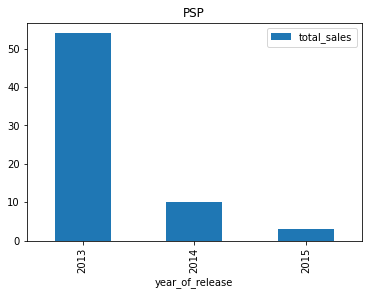

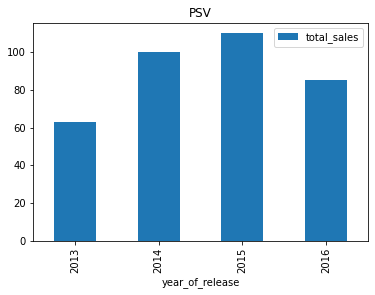

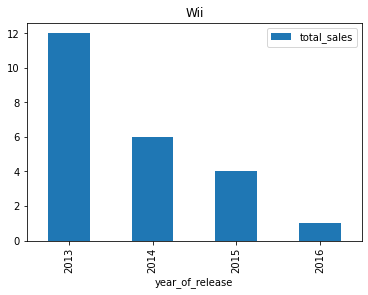

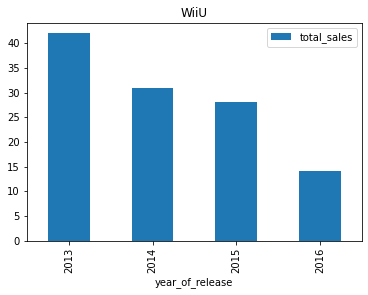

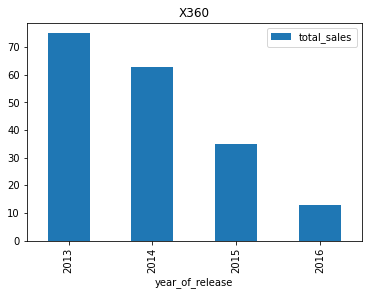

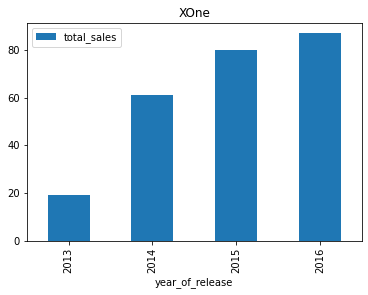

In [18]:
for platform in total_year_sale['platform'].unique():
    platform_data = total_year_sale[total_year_sale['platform'] == platform]
    platform_data.plot(x='year_of_release', y='total_sales', kind='bar')
    plt.title(platform)
    plt.show()

- como foi filtrado apenas para jogos lançados depois de 2013, varias plataformas já não são mais vendidas
- então os gráficos acima mostram apenas as plataformas mais atuais e como esta as vendas
- analisando os gráficos, é possível perceber que as plataformas PC, PS4 e XOne são as únicas que estão em crescimento

In [19]:
total_year_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   platform         40 non-null     object
 1   year_of_release  40 non-null     int64 
 2   total_sales      40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [20]:
mean_sale = total_year_sale.groupby('platform')['total_sales'].mean().reset_index()
print(mean_sale)

   platform  total_sales
0       3DS    75.750000
1        DS     8.000000
2        PC    47.250000
3       PS3    86.250000
4       PS4    98.000000
5       PSP    22.333333
6       PSV    89.500000
7       Wii     5.750000
8      WiiU    28.750000
9      X360    46.500000
10     XOne    61.750000


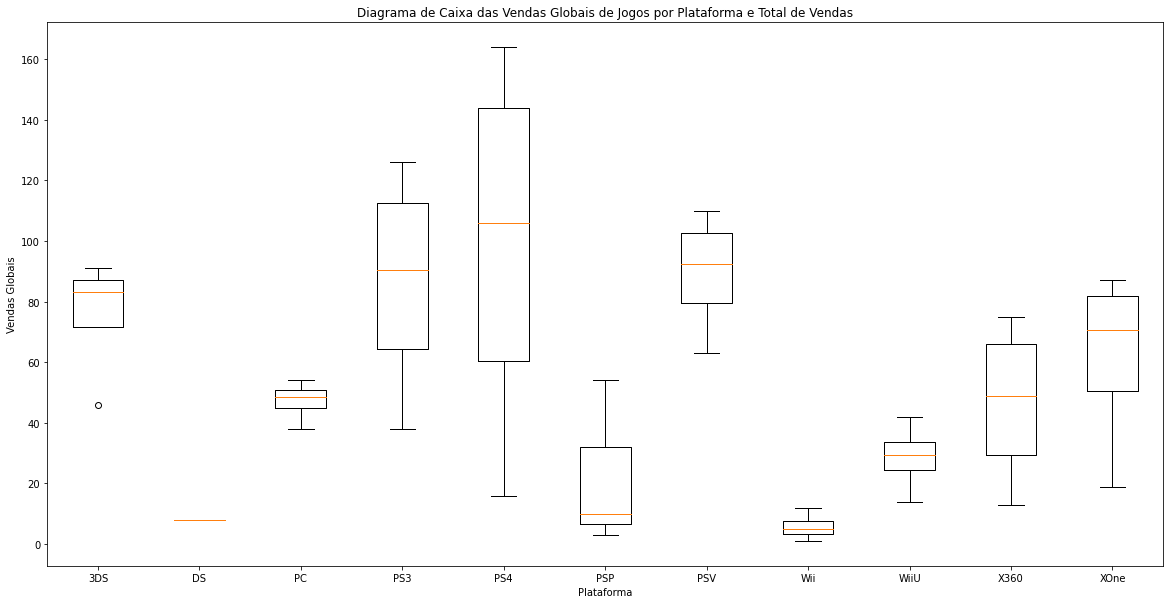

In [21]:
box_sale = total_year_sale.groupby(['platform', 'total_sales']).mean().reset_index()

data_dict = {}

for platform, group in box_sale.groupby('platform'):
    data_dict[platform] = group['total_sales']

plt.figure(figsize=(20, 10))
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.title('Diagrama de Caixa das Vendas Globais de Jogos por Plataforma e Total de Vendas')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')

plt.show()

In [22]:
duration_df = df_proj_int_1.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

duration_df['duration'] = duration_df['max'] - duration_df['min']
print(duration_df)


   platform   min   max  duration
0      2600  1980  1989         9
1       3DO  1994  1995         1
2       3DS  2011  2016         5
3        DC  1998  2008        10
4        DS  1985  2013        28
5        GB  1988  2001        13
6       GBA  2000  2007         7
7        GC  2001  2007         6
8       GEN  1990  1994         4
9        GG  1992  1992         0
10      N64  1996  2002         6
11      NES  1983  1994        11
12       NG  1993  1996         3
13       PC  1985  2016        31
14     PCFX  1996  1996         0
15       PS  1994  2003         9
16      PS2  2000  2011        11
17      PS3  2006  2016        10
18      PS4  2013  2016         3
19      PSP  2004  2015        11
20      PSV  2011  2016         5
21      SAT  1994  1999         5
22      SCD  1993  1994         1
23     SNES  1990  1999         9
24     TG16  1995  1995         0
25       WS  1999  2001         2
26      Wii  2006  2016        10
27     WiiU  2012  2016         4
28     X360  2

In [23]:
mean_duration = duration_df[['duration', 'platform']].mean()
median_duration = duration_df[['duration', 'platform']].median()
print(mean_duration)
print(median_duration)

duration    7.612903
dtype: float64
duration    6.0
dtype: float64


- a média é bem diferente do mediana
- o que mostra que existem plataformas que duram muito mais que as outras

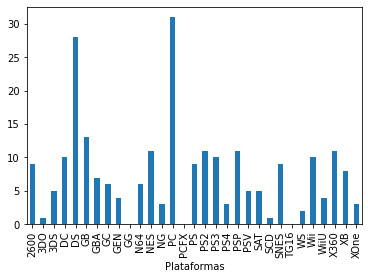

In [24]:
plot_duration = duration_df['duration'].plot(x = 'platform', y = 'year_of_release', kind = 'bar', xlabel = 'Plataformas')
plot_duration.set_xticklabels(duration_df['platform'], rotation=90) 
plt.show()

In [25]:
sale_mean = total_year_sale.groupby('platform')['total_sales'].mean()

print(sale_mean)

sale_desvio = total_year_sale.groupby('platform')['total_sales'].std()

print(sale_desvio)

platform
3DS     75.750000
DS       8.000000
PC      47.250000
PS3     86.250000
PS4     98.000000
PSP     22.333333
PSV     89.500000
Wii      5.750000
WiiU    28.750000
X360    46.500000
XOne    61.750000
Name: total_sales, dtype: float64
platform
3DS     20.336748
DS            NaN
PC       6.800735
PS3     38.973281
PS4     66.156380
PSP     27.646579
PSV     20.436895
Wii      4.645787
WiiU    11.528949
X360    27.922512
XOne    30.543685
Name: total_sales, dtype: float64


- as maiores médias de vendas não são as que estão com mais vendas atualmente, pois as novas plataformas estão em crescimento de vendas, porém como são mais recentes, tiverem menos anos de vendas
- com isso, é possivel concluir que fazendo a média para todo o periodo, não necessariamente a maior média é a mais lucrativa atualmente

In [26]:
df_proj_int_1.dropna(subset=['user_score'], inplace=True)
user_scores = df_proj_int_1.groupby('user_score')['total_sale'].mean().reset_index()
print(user_scores)

    user_score  total_sale
0          0.0    0.720000
1          0.2    1.650000
2          0.3    0.365000
3          0.5    0.595000
4          0.6    0.580000
..         ...         ...
90         9.3    1.463871
91         9.4    1.876364
92         9.5    0.346000
93         9.6    0.365000
94         9.7    1.040000

[95 rows x 2 columns]


<Figure size 1296x432 with 0 Axes>

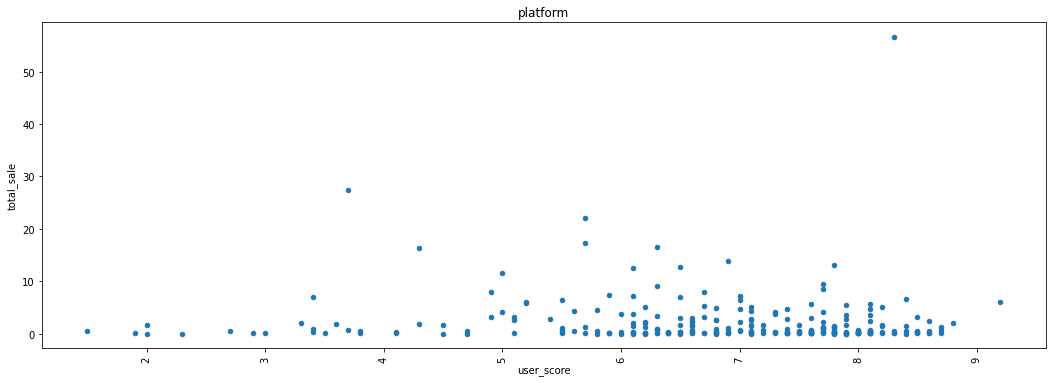

In [27]:
df_proj_int_1.dropna(subset=['user_score'], inplace=True)

platform = 'PS4'
platform_user_ps4 = df_proj_int_1[df_proj_int_1['platform'] == platform]
platform_user_ps4 = platform_user_ps4.sort_values('user_score')
plt.figure(figsize=(18, 6))
platform_user_ps4.plot(x='user_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()


<Figure size 1296x432 with 0 Axes>

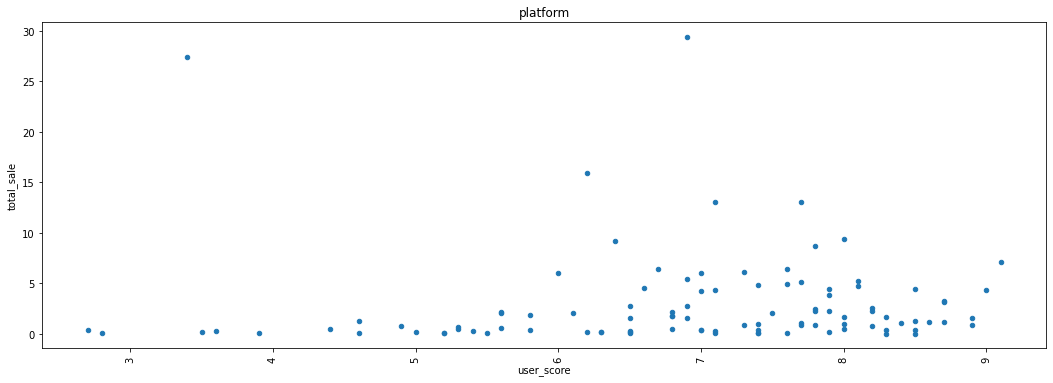

In [28]:
df_proj_int_1.dropna(subset=['user_score'], inplace=True)

platform = 'WiiU'
platform_user_wiiu = df_proj_int_1[df_proj_int_1['platform'] == platform]
platform_user_wiiu = platform_user_wiiu.sort_values('user_score')
plt.figure(figsize=(18, 6))
platform_user_wiiu.plot(x='user_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

- as duas plataformas foram escolhidas acima, devido as vendas estarem em crescimento
- o gráfico de dispersão mostra que as avaliações afetam a quantidade de venda, porém a partir de uma certa nota (acima de 6), a avaliação afeta pouco 

In [29]:
df_proj_int_1.dropna(subset=['critic_score'], inplace=True)
critic_scores = df_proj_int_1.groupby('critic_score')['total_sale'].mean().reset_index()
print(critic_scores)

    critic_score  total_sale
0           13.0    0.100000
1           17.0    0.260000
2           19.0    0.260000
3           20.0    1.150000
4           21.0    0.120000
..           ...         ...
76          94.0    7.091667
77          95.0    9.707500
78          96.0    9.885000
79          97.0   25.157273
80          98.0   12.925000

[81 rows x 2 columns]


<Figure size 1296x432 with 0 Axes>

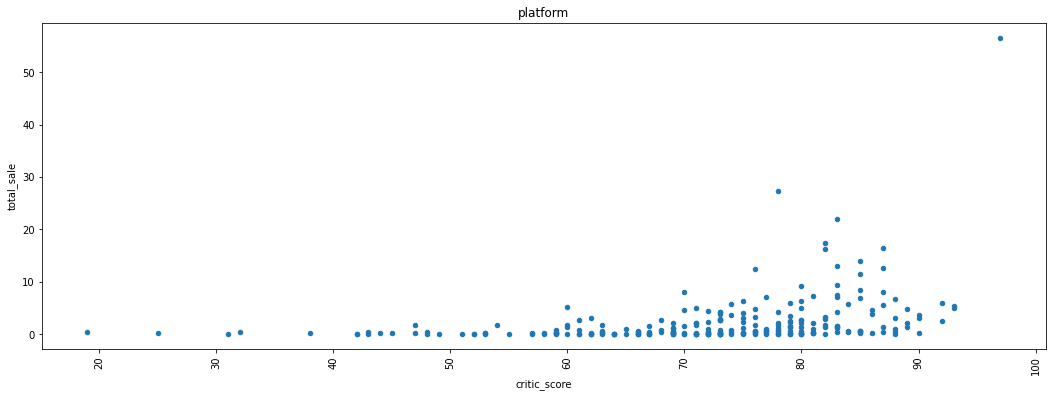

In [30]:
df_proj_int_1.dropna(subset=['critic_score'], inplace=True)

platform = 'PS4'
platform_critic_ps4 = df_proj_int_1[df_proj_int_1['platform'] == platform]
platform_critic_ps4 = platform_critic_ps4.sort_values('critic_score')
plt.figure(figsize=(18, 6))
platform_critic_ps4.plot(x='critic_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

<Figure size 1296x432 with 0 Axes>

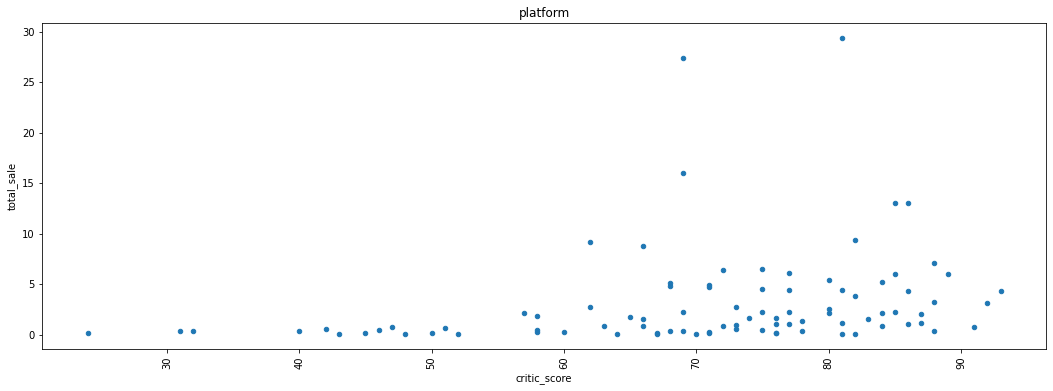

In [31]:
df_proj_int_1.dropna(subset=['critic_score'], inplace=True)

platform = 'WiiU'
platform_critic_wiiu = df_proj_int_1[df_proj_int_1['platform'] == platform]
platform_critic_wiiu = platform_critic_wiiu.sort_values('critic_score')
plt.figure(figsize=(18, 6))
platform_critic_wiiu.plot(x='critic_score', y='total_sale', kind='scatter', figsize=(18, 6))
plt.xticks(rotation=90)
plt.title('platform')
plt.show()

- aqui foram escolhidos as mesmas duas plataformas
- em relção as avaliações dos críticos, a relação é mais com a quantidade de vendas
- ou seja, quanto maior a nota dos críticos, mais é a venda
- porém também é possivel ver alguns pontos muito acima no número de vendas que não está relacionada com a nota

- resolvi não fazer o projeto até o final, pois como não sei se estou indo para o caminho certo
- e como estou com um pouco de dificuldade na continuidade, parei para saber qual caminho seguir

In [32]:
corr_critic = df_proj_int_1['critic_score'].corr(df_proj_int_1['total_sale'])  
print(corr_critic)

0.2743977675604708


In [33]:
corr_user = df_proj_int_1['user_score'].corr(df_proj_int_1['total_sale'])  
print(corr_user)

0.00577507721548819


- a correlação das revisões dos críticos e as vendas é baixa, porém pode influenciar
- já a correlação das revisões dos usuários e as vendas é bem  baixa, então dificilmente irá influenciar nas vendas

In [34]:
genre_sale = df_proj_int_1.groupby('genre')['total_sale'].sum()
genre_sale = genre_sale.sort_values(ascending=False)
print(genre_sale)

genre
Action          3871.41
Sports          2357.89
Shooter         2281.25
Racing          1143.25
Role-Playing     868.80
Misc             847.15
Platform         704.16
Fighting         557.82
Simulation       407.03
Adventure        149.89
Strategy         113.58
Puzzle            93.21
Name: total_sale, dtype: float64


In [35]:
platform_genre = df_proj_int_1.groupby(['genre', 'platform'])['total_sale'].sum()
print(platform_genre)

genre     platform
Action    3DS          98.86
          DS          157.06
          GBA          92.63
          GC          182.82
          PC          561.38
                       ...  
Strategy  Wii           2.48
          WiiU          1.12
          X360         16.52
          XB            3.19
          XOne          2.14
Name: total_sale, Length: 197, dtype: float64


In [36]:
genres = ['Action', 'Sports', 'Shooter', 'Racing']
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_genres = df_proj_int_1[df_proj_int_1['genre'].isin(genres)]
filtered_platforms = filtered_genres[filtered_genres['platform'].isin(platforms_sale)]
platform_genre = filtered_platforms.groupby(['genre', 'platform'])['total_sale'].sum()
print(platform_genre)


genre    platform
Action   3DS          98.86
         PC          561.38
         PS4         201.26
         WiiU        121.70
         XOne        154.33
Racing   3DS          16.14
         PC          120.56
         PS4          14.75
         WiiU          7.09
         XOne         19.31
Shooter  3DS           1.03
         PC          424.97
         PS4         153.14
         WiiU         63.41
         XOne        161.38
Sports   3DS           2.19
         PC          142.24
         PS4         134.11
         WiiU         14.50
         XOne        131.07
Name: total_sale, dtype: float64


- os gêneros mais lucrativos são Action, Sports, Shooter e Racing
- dentro desse foram selecionados as 5 principais plataformas
- em todos os gêneros, a plataforma PC sempre é a que mais vende
- ou seja, o tipo de plataforma interfere nas quantidade de vendas


# Etapa 4 - Crie um perfil para cada região

In [37]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_proj_int_1[df_proj_int_1['platform'].isin(platforms_sale)]
sales_na = filtered_platforms.groupby('platform')['na_sales'].sum()
print(sales_na)

platform
3DS     48.67
PC      63.88
PS4     84.46
WiiU    30.69
XOne    76.03
Name: na_sales, dtype: float64


In [38]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_proj_int_1[df_proj_int_1['platform'].isin(platforms_sale)]
sales_eu = filtered_platforms.groupby('platform')['eu_sales'].sum()
print(sales_eu)

platform
3DS      33.33
PC      107.62
PS4     112.44
WiiU     20.42
XOne     42.23
Name: eu_sales, dtype: float64


In [39]:
platforms_sale = ['PC', 'PS4', 'XOne', '3DS', 'WiiU']
filtered_platforms = df_proj_int_1[df_proj_int_1['platform'].isin(platforms_sale)]
sales_jp = filtered_platforms.groupby('platform')['jp_sales'].sum()
print(sales_jp)

platform
3DS     33.87
PC       0.17
PS4      9.43
WiiU    10.17
XOne     0.29
Name: jp_sales, dtype: float64


In [40]:
platform_genre_na = filtered_platforms.groupby(['genre', 'platform'])['na_sales'].sum()
print(platform_genre_na)

genre         platform
Action        3DS         13.99
              PC           7.62
              PS4         26.41
              WiiU         6.92
              XOne        16.52
Adventure     3DS          0.78
              PC           0.11
              PS4          0.97
              WiiU         0.03
              XOne         0.68
Fighting      3DS          1.13
              PC           0.01
              PS4          2.84
              WiiU         0.59
              XOne         1.56
Misc          3DS          1.79
              PC           1.69
              PS4          1.23
              WiiU         5.13
              XOne         2.72
Platform      3DS         11.37
              PC           0.05
              PS4          1.95
              WiiU         9.85
              XOne         0.29
Puzzle        3DS          0.73
              PC           0.03
              PS4          0.00
              WiiU         0.62
Racing        3DS          5.61
              PC 

In [41]:
platform_genre_eu = filtered_platforms.groupby(['genre', 'platform'])['eu_sales'].sum()
print(platform_genre_eu)

genre         platform
Action        3DS          8.41
              PC          15.36
              PS4         35.66
              WiiU         4.81
              XOne        10.11
Adventure     3DS          0.46
              PC           1.58
              PS4          1.55
              WiiU         0.05
              XOne         0.76
Fighting      3DS          0.84
              PC           0.11
              PS4          2.40
              WiiU         0.34
              XOne         0.48
Misc          3DS          1.21
              PC           1.19
              PS4          1.15
              WiiU         3.39
              XOne         0.99
Platform      3DS          8.41
              PC           0.33
              PS4          2.84
              WiiU         6.27
              XOne         0.28
Puzzle        3DS          1.02
              PC           0.13
              PS4          0.02
              WiiU         0.38
Racing        3DS          4.45
              PC 

In [42]:
platform_genre_jp = filtered_platforms.groupby(['genre', 'platform'])['jp_sales'].sum()
print(platform_genre_jp)

genre         platform
Action        3DS         6.60
              PC          0.00
              PS4         3.40
              WiiU        0.77
              XOne        0.05
Adventure     3DS         0.66
              PC          0.00
              PS4         0.14
              WiiU        0.00
              XOne        0.02
Fighting      3DS         0.46
              PC          0.00
              PS4         0.54
              WiiU        0.19
              XOne        0.00
Misc          3DS         1.22
              PC          0.00
              PS4         0.04
              WiiU        1.64
              XOne        0.01
Platform      3DS         5.94
              PC          0.00
              PS4         0.45
              WiiU        3.68
              XOne        0.00
Puzzle        3DS         0.75
              PC          0.00
              PS4         0.00
              WiiU        0.20
Racing        3DS         2.83
              PC          0.00
              PS

- é possível perceber que existe relação entre a região, a plataforma e a quantidade de vendas
- com exceção do XOne, todas as demais plataformas, as maiores vendas são nas mesmas regiões
- por exemplo, na plataforma PC, as maiores vendas são sempre na regiao EU
- já na plataforma WiiU, as maiores vendas são sempre na região NA

In [43]:
user_tbd = ['tbd']
filtered_na = df_proj_int_1[df_proj_int_1['user_score'].isin(user_tbd)]
user_na = filtered_na['na_sales'].count()
print(user_na)

0


In [44]:
user_tbd = ['tbd']
filtered_eu = df_proj_int_1[df_proj_int_1['user_score'].isin(user_tbd)]
user_eu = filtered_eu['na_sales'].count()
print(user_eu)

0


In [45]:
user_tbd = ['tbd']
filtered_jp = df_proj_int_1[df_proj_int_1['user_score'].isin(user_tbd)]
user_jp = filtered_jp['jp_sales'].count()
print(user_jp)

0


- eu sei que existe valores na coluna user_score com valor 'tbd', porém não estou conseguindo usar uma fórmula para conta-los

In [46]:
df_proj_int_1['user_score'].isna().sum()

0

In [47]:
df_proj_int_1['user_score'].unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 9.3, 6.2, 4.2, 6. , 4.9, 3.7, 4.1, 5.8, 5.6, 5.5,
       4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.5, 5.1, 3.5, 2.5, 1.9,
       2.2, 2. , 9.5, 4.7, 2.1, 3.6, 1.8, 3.8, 3. , 9.6, 2.8, 1.7, 2.7,
       2.4, 1.5, 1.2, 2.3, 0.5, 0.6, 0.9, 1. , 1.4, 1.3, 0.7])

- a remoção dos valores ausentes foi feito para poder trasnformar a coluna apenas em valores numéricos
- como é uma coluna de pontuação que os usuários deram para os filmes, não tem sentido fazer uma média ou qaulquer outro tipo de cálculo, pois são jogos diferentes, plataformas diferentes, épocas diferentes.
- então, preencher com valores calculados ou "chutes" poderia mudar completamente a relaidade do jogo e com isso mudar as vendas  e a produção


# Etapa 5 - Teste as seguintes hipóteses

- Hipótese Nula (H0): As classificações médias dos usuários das plataformas XBox One e PC são as mesmas
- Hipótese Alternativa (H1): As classificações médias não são iguais

In [52]:
alpha = 0.05
rating_xone = df_proj_int_1[df_proj_int_1['platform'] == 'XOne']['user_score']
rating_pc = df_proj_int_1[df_proj_int_1['platform'] == 'PC']['user_score']
results = st.ttest_ind(rating_xone, rating_pc)

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.00010211482734739934
Rejeitamos a hipótese nula


- Hipótese Nula (H0): As classificações médias de usuários para os gêneros Action e Sports são diferentes
- Hipótese Alternativa (H1): As classificações médias não são diferentes

In [53]:
alpha = 0.05
rating_action = df_proj_int_1[df_proj_int_1['genre'] == 'Action']['user_score']
rating_sports = df_proj_int_1[df_proj_int_1['genre'] == 'Sports']['user_score']

print('valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p: 0.00010211482734739934
Rejeitamos a hipótese nula


# Etapa 6 - Conclusão geral

- existe uma relação entre o ano de lançamento e a quantidade de jogos lançados 
- existiu um pico de lançamentos no começo dos anos 2000
- a quantidade de venda depende do tipo de plataforma
- existem algumas plataformas que não existem mais e normalmente está relacionado ao lançamento de um novo modelo
- a maior quantidade de vendas não necessariamente indica a mais lucrativa, pois algumas plataformas estão em crescimento
- as avaliações, tanto dos usuários como dos críticos, afetam um pouco as vendas
- existem gêneros que vendem mais e existe uma plataforma que sempre vende mais dentro desses gêneros
- a região, a plataforma e a quantidade de vendas estão diretamente relacionados
- através do teste de hipótese, foi possível ver que as classificações médias dos usuários e as plataformas indicadas não são iguais
- através do teste de hipótese, foi possível ver que as classificações médias dos usuários e os gêneros indicados não são diferentes